<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Known_Cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [2]:
total_cases = pd.read_csv("https://covid.ourworldindata.org/data/total_cases.csv", index_col='date')
total_cases[["France", "Italy"]].tail(3)

,France,Italy
date,,
2020-03-15,4469.0,21157.0
2020-03-16,5380.0,24747.0
2020-03-17,6573.0,27980.0


In [0]:
cases100_France = total_cases.query("France > 100")["France"]
days100_France = np.arange(len(cases100_France))

In [0]:
cases100_Italy = total_cases.query("Italy > 100")["Italy"]
days100_Italy = np.arange(len(cases100_Italy))

On February 24, Italy reaches more than 100 cases, on March 4 Italy closes schools and universities, and on March 8 Italy imposes lockdown.

On March 3, France reaches more than 100 cases, on March 16 (13 days later) France is closing schools and universities.

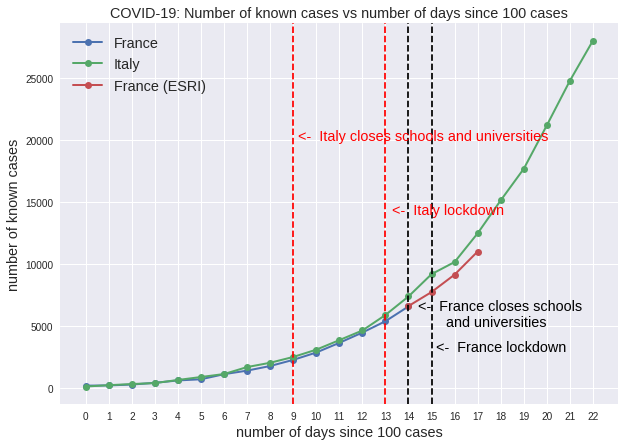

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(days100_France, cases100_France, label='France', linewidth=2, marker='o')
plt.plot(days100_Italy, cases100_Italy, label='Italy',  linewidth=2, marker='o')
plt.plot(np.array([14, 15, 16, 17]), np.array([6604, 7730, 9134, 10995]), label='France (ESRI)', linewidth=2, marker='o')
plt.axvline(9, color='red', linestyle='dashed')
plt.axvline(13, color='red', linestyle='dashed')
plt.axvline(14, color='black', linestyle='dashed')
plt.axvline(15, color='black', linestyle='dashed')
plt.annotate('<-  Italy closes schools and universities', (9.2,20000.0), color='red', fontsize='x-large')
plt.annotate('<-  Italy lockdown', (13.3,14000.0), color='red', fontsize='x-large')
plt.annotate('<-  France closes schools\n       and universities', (14.4,5000.0), color='black', fontsize='x-large')
plt.annotate('<-  France lockdown', (15.2,3000.0), color='black', fontsize='x-large')
ax.set_title('COVID-19: Number of known cases vs number of days since 100 cases', fontsize='x-large')
ax.set_xlabel('number of days since 100 cases', fontsize='x-large')
ax.set_ylabel('number of known cases', fontsize='x-large')
ax.set_xticks(np.arange(len(cases100_Italy)))
plt.legend(fontsize='x-large')
plt.show()

In logarithmic scale:

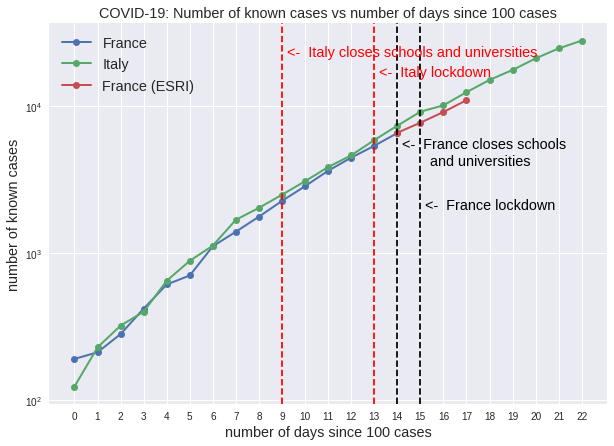

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(days100_France, cases100_France, label='France', linewidth=2, marker='o')
plt.plot(days100_Italy, cases100_Italy, label='Italy',  linewidth=2, marker='o')
plt.plot(np.array([14, 15, 16, 17]), np.array([6604, 7730, 9134, 10995]), label='France (ESRI)', linewidth=2, marker='o')
plt.axvline(9, color='red', linestyle='dashed')
plt.axvline(13, color='red', linestyle='dashed')
plt.axvline(14, color='black', linestyle='dashed')
plt.axvline(15, color='black', linestyle='dashed')
plt.annotate('<-  Italy closes schools and universities', (9.2,22000.0), color='red', fontsize='x-large')
plt.annotate('<-  Italy lockdown', (13.2,16000.0), color='red', fontsize='x-large')
plt.annotate('<-  France closes schools\n       and universities', (14.2,4000.0), color='black', fontsize='x-large')
plt.annotate('<-  France lockdown', (15.2,2000.0), color='black', fontsize='x-large')
ax.set_title('COVID-19: Number of known cases vs number of days since 100 cases', fontsize='x-large')
ax.set_xlabel('number of days since 100 cases', fontsize='x-large')
ax.set_ylabel('number of known cases', fontsize='x-large')
ax.set_xticks(np.arange(len(cases100_Italy)))
plt.yscale("log")
plt.legend(fontsize='x-large')
plt.show()